### Part 2 - Analyzing the PhotoUpload event

#### Importing packages

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
plt.rcParams['figure.figsize'] = [5.0, 4.0]
plt.rcParams['figure.dpi'] = 140
sns.set_theme(style="darkgrid")

#### Reading in data from a json file

In [23]:
events_df = pd.read_json("event_counts.json", orient="index")
events_df.head()

,GuideSession,GuideDownload,ConnectionRequested,PhotoUpload
757,22.0,2.0,NaN,NaN
194,5.0,1.0,1.0,14.0
1656,32.0,1.0,NaN,NaN
563,11.0,1.0,NaN,2.0
1276,13.0,1.0,NaN,NaN


#### Exploring and cleaning the data

In [31]:
events_df.shape

(2500, 4)

In [28]:
events_df.fillna(0, inplace=True)
events_df.head()

,GuideSession,GuideDownload,ConnectionRequested,PhotoUpload
757,22.0,2.0,0.0,0.0
194,5.0,1.0,1.0,14.0
1656,32.0,1.0,0.0,0.0
563,11.0,1.0,0.0,2.0
1276,13.0,1.0,0.0,0.0


In [65]:
events_df["PhotoUpload"].describe()

count    2500.000000
mean        2.007200
std         4.793948
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        24.000000
Name: PhotoUpload, dtype: float64

#### Plotting a histogram of the `PhotoUpload` event per user

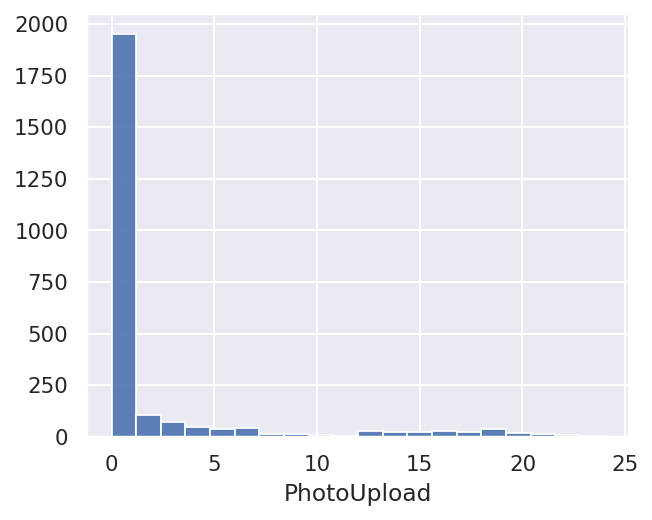

In [70]:
sns.distplot(events_df["PhotoUpload"], kde=False, bins=20, hist_kws = {'alpha':0.9})
plt.savefig('plots/photo_upload_hist.png')

### Comparison of `PhotoUpload` to other events

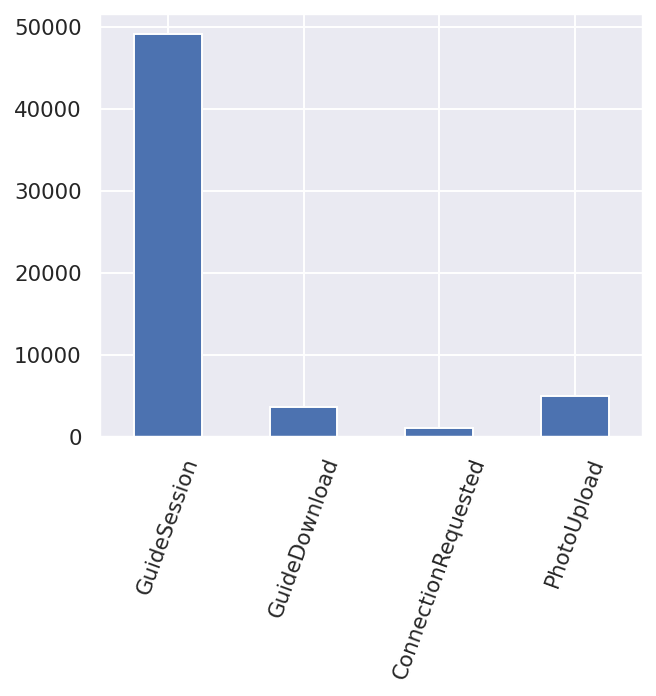

In [74]:
events_df_agg = events_df.agg("sum", axis=0)
events_df_agg.plot.bar(rot=70)
plt.savefig('plots/events_comparison.png')